In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(2)

In [66]:
df=pd.read_csv('lend-or-lose/train.csv')
class_counts = df['Default'].value_counts()
print(class_counts)
df

Default
0    180524
1     23753
Name: count, dtype: int64


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [67]:
col_to_convert=["Education","EmploymentType","MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner"]
le_dict={}

for col in col_to_convert:
    le=LabelEncoder()
    le_dict[col]=le
    df[col]=le.fit_transform(df[col])

df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,0,1,0,0,0,3,1,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,0,2,2,0,0,1,1,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,3,0,2,1,0,0,0,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,1,2,1,1,0,3,0,0


In [68]:
features=df.columns.to_numpy()
features=features[(features!="LoanID") & (features!="Default")]
features  # Removes values at indices 1 and 3

array(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'], dtype=object)

In [69]:
null_value_percentages=(df.isna().sum()/df.shape[0])*100
null_value_percentages

LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
dtype: float64

In [70]:
# 3. Classifiers:
# Probabilistic Classifier: Bayes classifier, Logistic regression
# Non-Probabilistic classifier: K-nearest neighbours
# 4. Decision Trees
# 5. Random Forests
# 6. Gradient Boosting
# Adaboost

In [71]:
scaler=StandardScaler()
normalized_features=scaler.fit_transform(df[features])
normalized_features=scaler.transform(df[features])

normalized_features

array([[-1.69983849e+00,  1.41378519e+00,  1.15148725e+00, ...,
        -1.00040639e+00, -7.07809999e-01, -1.00056312e+00],
       [ 2.34119601e-01, -6.49831145e-01, -1.71586596e+00, ...,
         9.99593771e-01, -3.11708348e-04, -1.00056312e+00],
       [-1.16633281e+00,  4.67696561e-02, -4.58436895e-01, ...,
        -1.00040639e+00,  1.41468487e+00,  9.99437197e-01],
       ...,
       [ 1.23444275e+00, -1.23573162e+00, -9.58331812e-01, ...,
        -1.00040639e+00, -1.41530829e+00, -1.00056312e+00],
       [ 3.40549710e-02,  1.63677754e+00,  1.00072842e+00, ...,
        -1.00040639e+00,  7.07186583e-01, -1.00056312e+00],
       [-4.99450708e-01,  3.93760753e-01,  8.61556661e-01, ...,
        -1.00040639e+00,  7.07186583e-01, -1.00056312e+00]])

In [72]:
class OutlierRemoval:
    def __init__(self, col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        inter_quartile_range = q3 - q1
        self.upper_whisker = q3 + inter_quartile_range * 1.5
        self.lower_whisker = q1 - inter_quartile_range * 1.5
        self.has_outliers = False  # Track if outliers exist

    def replace_outlier(self, value):
        # Check if the value is an outlier and set `has_outliers` to True if it is
        if value < self.lower_whisker or value > self.upper_whisker:
            self.has_outliers = True
            return min(max(value, self.lower_whisker), self.upper_whisker)
        return value

def replace_outliers(df, columns):
    outlier_columns = []  # To store column names with outliers
    for col in columns:
        outlier_remover = OutlierRemoval(df[col])
        df[col] = df[col].apply(outlier_remover.replace_outlier)
        if outlier_remover.has_outliers:  # If outliers were replaced
            outlier_columns.append(col)
    print("Columns with outliers:", outlier_columns)  # Print the columns with outliers
    return df

# Replace outliers in the DataFrame `df` for selected columns
df = replace_outliers(df, features)
df


Columns with outliers: []


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,0,1,0,0,0,3,1,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,0,2,2,0,0,1,1,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,3,0,2,1,0,0,0,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,1,2,1,1,0,3,0,0


In [73]:
ros = RandomOverSampler(random_state=2)
X_oversampled, Y_oversampled = ros.fit_resample(normalized_features, df["Default"])

rus = RandomUnderSampler(random_state=2)
X_undersampler, Y_undersampler = rus.fit_resample(normalized_features, df["Default"])

In [74]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, Y_oversampled, test_size=0.3, random_state=2)

X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampler, Y_undersampler, test_size=0.3, random_state=2)

In [ ]:
def train_normalized(model,name,sample,X_train,Y_train,X_val,Y_val,X_test):
    model.fit(X_train,Y_train) 
    y_pred=model.predict(X_val)
    accuracy=accuracy_score(Y_val,y_pred)
    print(accuracy)
    
    y_pred=model.predict(X_test)

    submission=pd.DataFrame({
        "LoanID":test_df["LoanID"].to_numpy(),
        "Default": y_pred
    })

    submission.to_csv(f'{name}/{name}_{sample}.csv')
    
    return accuracy

In [75]:
# model_oversampled = GaussianNB()
# model_oversampled.fit(X_train_oversampled, y_train_oversampled)

# y_pred = model_oversampled.predict(X_test_oversampled)

# accuracy = accuracy_score(y_test_oversampled, y_pred)
# print("Oversampled Accuracy:", accuracy)

# model_undersampled = GaussianNB()
# model_undersampled.fit(X_train_undersampled, y_train_undersampled)

# y_pred = model_oversampled.predict(X_test_undersampled)

# accuracy = accuracy_score(y_test_undersampled, y_pred)
# print("Undersampled Accuracy:", accuracy)



Oversampled Accuracy: 0.6802381941559341
Undersampled Accuracy: 0.6849564973337076


In [76]:
test_df=pd.read_csv("lend-or-lose/test.csv")

for col, le in le_dict.items():
    test_df[col]=le.fit_transform(test_df[col])

# normalized_features=scaler.fit_transform(test_df[features])
normalized_features=scaler.transform(test_df[features])

y_pred = model_oversampled.predict(test_df[features])
submission_oversampled=pd.DataFrame({
    "LoanID":test_df["LoanID"],
    "Default": y_pred
})

y_pred = model_undersampled.predict(test_df[features])
submission_undersampled=pd.DataFrame({
    "LoanID":test_df["LoanID"],
    "Default": y_pred
})

/home/dell/miniforge3/envs/default/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/home/dell/miniforge3/envs/default/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [77]:
submission_oversampled.to_csv("NaiveBayesClassifier/NaiveBayesClassifier_oversampled.csv",index=False)
submission_undersampled.to_csv("NaiveBayesClassifier/NaiveBayesClassifier_undersampled.csv",index=False)

In [78]:
logisticRegression_oversampled = LogisticRegression(random_state=2, max_iter=500)
logisticRegression_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on test data
y_pred = logisticRegression_oversampled.predict(X_test_oversampled)
accuracy = accuracy_score(y_test_oversampled, y_pred)
print("Oversampled Accuracy:", accuracy)

logisticRegression_undersampled = LogisticRegression(random_state=2, max_iter=500)
logisticRegression_undersampled.fit(X_train_undersampled, y_train_undersampled)

y_pred = logisticRegression_undersampled.predict(X_test_undersampled)
accuracy = accuracy_score(y_test_undersampled, y_pred)
print("Undersampled Accuracy:", accuracy)

Oversampled Accuracy: 0.6804136084568158
Undersampled Accuracy: 0.6841145102441762


In [79]:
y_pred = logisticRegression_oversampled.predict(test_df[features])
submission_oversampled=pd.DataFrame({
    "LoanID":test_df["LoanID"],
    "Default": y_pred
})

y_pred = logisticRegression_undersampled.predict(test_df[features])
submission_undersampled=pd.DataFrame({
    "LoanID":test_df["LoanID"],
    "Default": y_pred
})

/home/dell/miniforge3/envs/default/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/dell/miniforge3/envs/default/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [80]:
submission_oversampled.to_csv("LogisticRegression/LogisticRegression_oversampled.csv",index=False)
submission_undersampled.to_csv("LogisticRegression/LogisticRegression_undersampled.csv",index=False)

In [81]:
k_values = range(1, 21)  # Adjust the upper limit if you want to test more values
accuracies = []
best_acc=0
knn_oversampled=None

# Loop over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_oversampled, y_train_oversampled)
    y_pred = knn.predict(X_test_oversampled)
    if acc>best_acc:
        best_acc=acc
        acc = accuracy_score(y_test_oversampled, y_pred)
        knn_oversampled=knn
    print(k,acc)
    accuracies.append(acc)

# Plot k vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy for KNN")
plt.xticks(k_values)  # Make sure all values of k are shown on the x-axis
plt.grid(True)
plt.show()

1 0.9311914323962517
2 0.9226976873009278
3 0.9226976873009278
4 0.9226976873009278
5 0.9226976873009278
6 0.9226976873009278
7 0.9226976873009278
8 0.9226976873009278


k = 1, Accuracy = 0.5707
k = 2, Accuracy = 0.5695
k = 3, Accuracy = 0.6003
k = 4, Accuracy = 0.6009
k = 5, Accuracy = 0.6156
k = 6, Accuracy = 0.6169
k = 7, Accuracy = 0.6243
k = 8, Accuracy = 0.6259
k = 9, Accuracy = 0.6346
k = 10, Accuracy = 0.6358
k = 11, Accuracy = 0.6410
k = 12, Accuracy = 0.6408
k = 13, Accuracy = 0.6455
k = 14, Accuracy = 0.6458
k = 15, Accuracy = 0.6501
k = 16, Accuracy = 0.6494
k = 17, Accuracy = 0.6532
k = 18, Accuracy = 0.6537
k = 19, Accuracy = 0.6572
k = 20, Accuracy = 0.6570


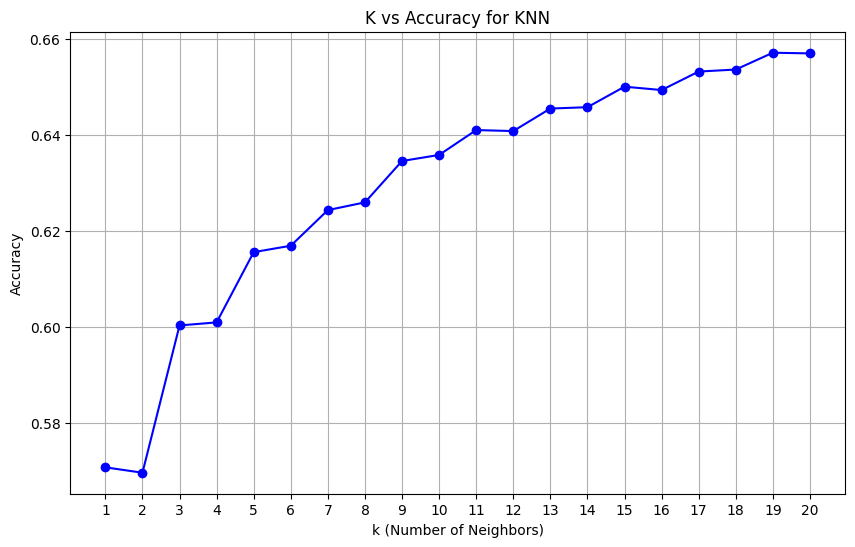

In [ ]:
best_acc = 0
accuracies = []
k_values = range(15, 35)  # Adjust the upper limit if you want to test more values
knn_undersampled=None

# Loop over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_undersampled, y_train_undersampled)
    y_pred = knn.predict(X_test_undersampled)
    acc = accuracy_score(y_test_undersampled, y_pred)  # Calculate accuracy before the conditional check
    
    # Check if this is the best accuracy so far
    if acc > best_acc:
        best_acc = acc
        knn_undersampled = knn

    # Append the accuracy for the current k value to the accuracies list
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

# Plot k vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy for KNN")
plt.xticks(k_values)  # Make sure all values of k are shown on the x-axis
plt.grid(True)
plt.show()

In [ ]:
y_pred = knn_oversampled.predict(test_df[features])
submission_oversampled=pd.DataFrame({
    "LoanID":test_df["LoanID"],
    "Default": y_pred
})

y_pred = knn_undersampled.predict(test_df[features])
submission_undersampled=pd.DataFrame({
    "LoanID":test_df["LoanID"],
    "Default": y_pred
})

/home/dell/miniforge3/envs/default/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/dell/miniforge3/envs/default/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission_oversampled.to_csv("KNN/knn_oversampled.csv",index=False)
submission_undersampled.to_csv("KNN/knn_undersampled.csv",index=False)